<a href="https://colab.research.google.com/github/Rathi458/AL-and-ML-projects/blob/main/Netflix_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2: In-Depth Exploratory Data Analysis (EDA)
## Netflix Content Analysis 🎬

**Project Objective:** To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.


In [102]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
# Set a consistent style for plot
sns.set_style('darkgrid')

##Load the dataset and initial inspection
We'll load the `netflix_titles.csv` dataset and perform a high-level overview

In [103]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [104]:
df=pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [105]:
df.shape

(7787, 12)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Interpretation of `.info()`:**
- We have 7787 entries (titles).
- **Key Problem:** The `date_added` column is of type `object` (a string), not a `datetime` object. We cannot perform time-based analysis until this is corrected.
- **Missing Values:** `director`, `cast`, `country`, `date_added`, and `rating` all have missing values. `director` has the most significant number of nulls.

In [107]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.


In [108]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [109]:
#Handling missing value for director and cast
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')

In [110]:
df['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [111]:
#handling missing value for country
df['country'].fillna(df['country'].mode())[0]

'Brazil'

In [112]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [113]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [114]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,505
date_added,0
release_year,0
rating,0
duration,0


In [115]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',dayfirst=True)

In [116]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

### Step 4: Exploratory Data Analysis & Visualization


#### 4.1 What is the distribution of content type?

---



In [117]:
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


Text(0.5, 1.0, 'Distribution of Content Type')

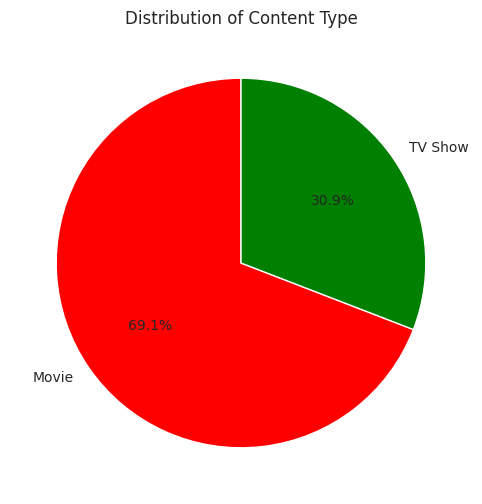

In [118]:
plt.figure(figsize=(8,6))
type_count=df['type'].value_counts()
plt.pie(type_count,labels=type_count.index,autopct='%1.1f%%',startangle=90,colors=['red','green'])
plt.title('Distribution of Content Type')

**Insight:** The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

#### 4.2 How has content been added over time?

<Figure size 1400x800 with 0 Axes>

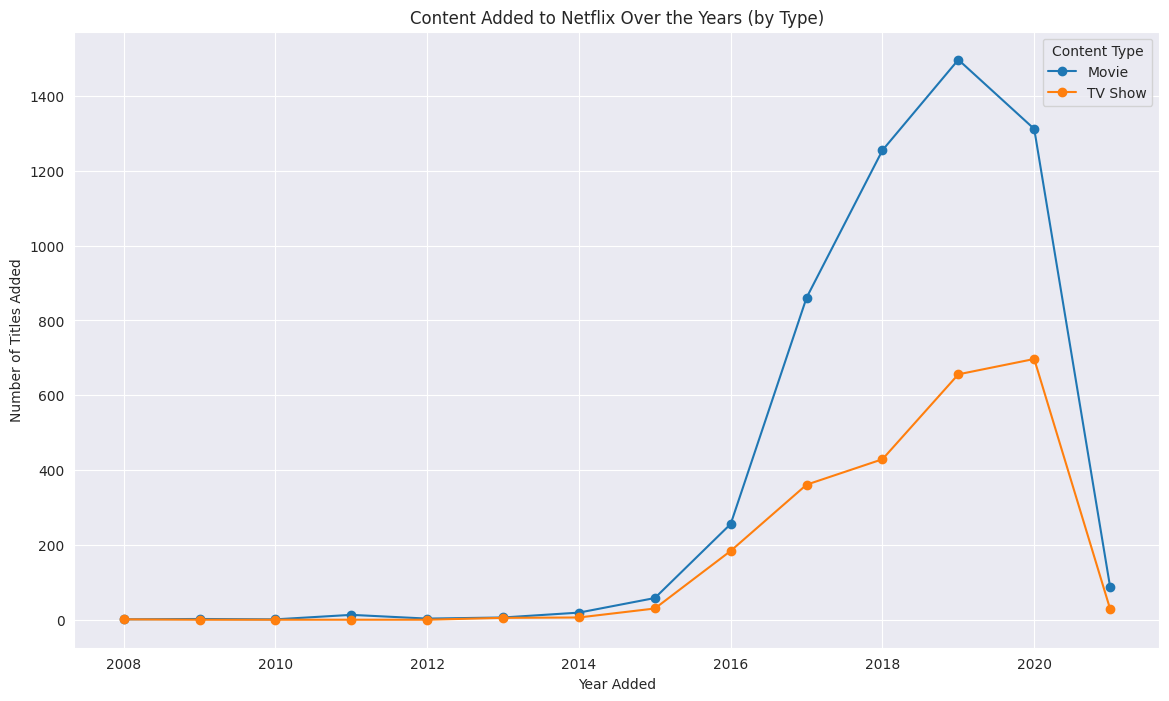

In [119]:
content_over_time=df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

:**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

#### 4.3 What are the most popular genres?

In [120]:
df['listed_in'].value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


#Handling Multi-Value Text Columns

In [121]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [122]:
df['listed_in'].str.split(', ')

,listed_in
0,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,"[Dramas, International Movies]"
2,"[Horror Movies, International Movies]"
3,"[Action & Adventure, Independent Movies, Sci-F..."
4,[Dramas]
...,...
7782,"[Dramas, International Movies]"
7783,"[Dramas, International Movies, Music & Musicals]"
7784,"[Documentaries, International Movies, Music & ..."
7785,"[International TV Shows, Reality TV]"


In [123]:
genres=df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

In [124]:
genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [125]:
top_genre=genres['genre'].value_counts().reset_index()
top_genre.columns=['genre','count']

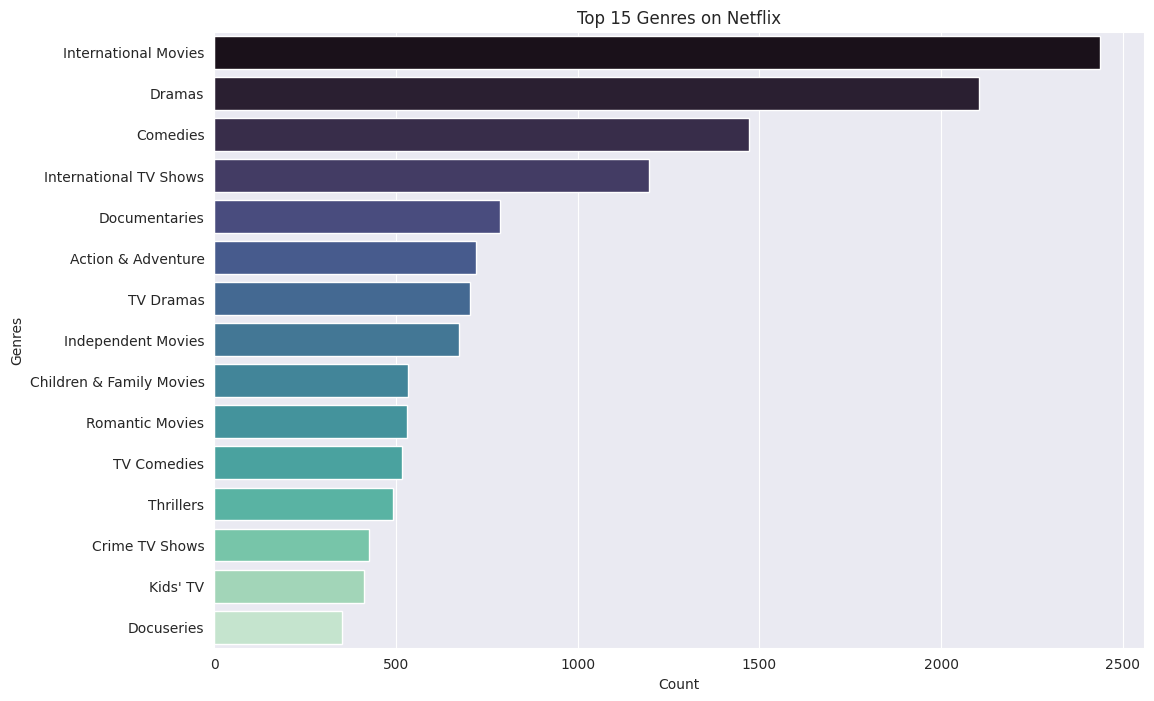

In [126]:
#top 15 genres
top_15_genres=top_genre.head(15)

plt.figure(figsize=(12,8))
sns.barplot(y='genre',x='count',data=top_15_genres,palette='mako',hue='genre',legend=False)
plt.title("Top 15 Genres on Netflix")
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

#### 4.4 What is the distribution of content duration?

In [127]:
#seperating tv shows and movies
movies_df=df[df['type']=='Movie'].copy()
tv_shows_df=df[df['type']=='TV Show'].copy()

In [128]:
# Clean and convert duration for movies
movies_df['duration_min']=movies_df['duration'].str.replace(' min','').astype(int)
# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

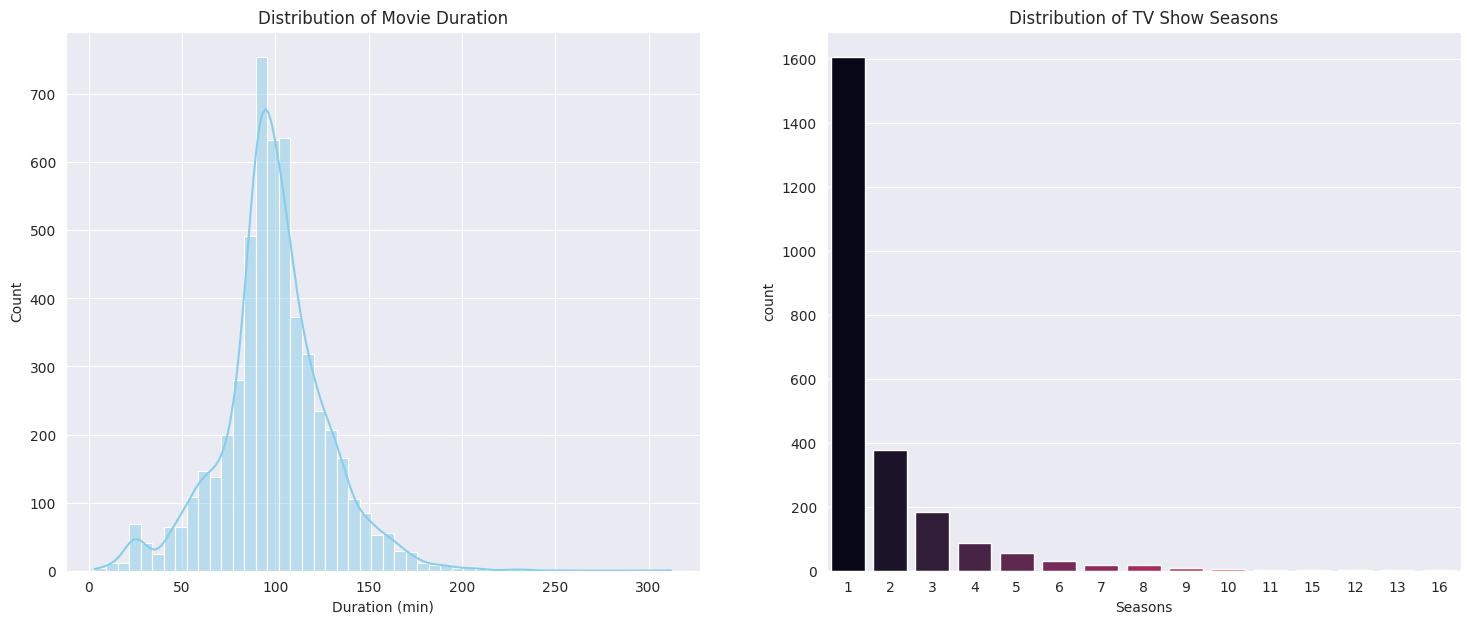

In [129]:
#Plot the distribution
fig,axes=plt.subplots(1,2,figsize=(18,7))
#Movies
sns.histplot(ax=axes[0],x='duration_min',data=movies_df,bins=50,kde=True,color='skyblue')
axes[0].set_title('Distribution of Movie Duration')
axes[0].set_xlabel('Duration (min)')
#TV shows
sns.countplot(ax=axes[1],x='seasons',data=tv_shows_df,palette='rocket',order=tv_shows_df['seasons'].value_counts().index,hue='seasons',legend=False)
axes[1].set_title('Distribution of TV Show Seasons')
axes[1].set_xlabel('Seasons')
plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

#### 4.5 Where does the content come from? (Geographical Analysis)

In [130]:
df['country'].value_counts()

,count
country,
United States,2546
India,923
United Kingdom,396
Japan,224
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [131]:
countries=df.assign(country=df['country'].str.split(', ')).explode('country')

In [132]:
top_countries_count=countries['country'].value_counts().reset_index()
top_countries_count.columns=['country','count']

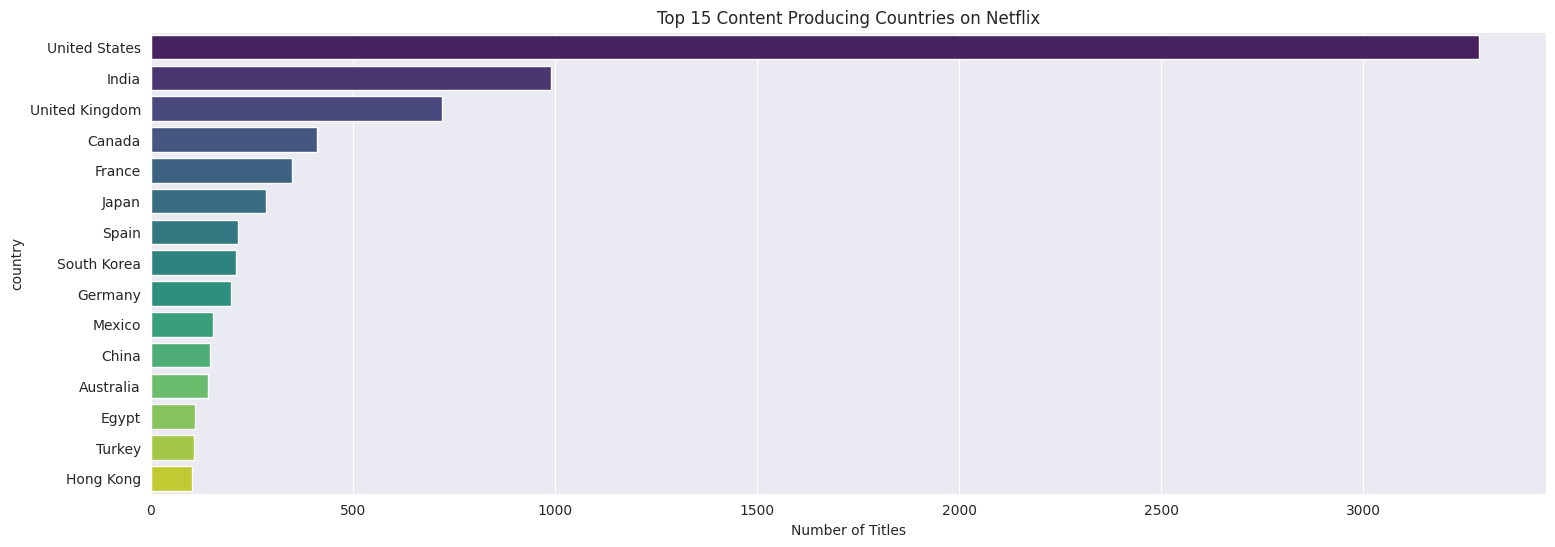

In [133]:
top_15_countries=top_countries_count.head(15)
plt.figure(figsize=(18,6))
sns.barplot(x='count',y='country',data=top_15_countries,palette='viridis',hue='country',legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.ylabel('country')
plt.xlabel('Number of Titles')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

#### 4.6 What are the maturity ratings of the content?

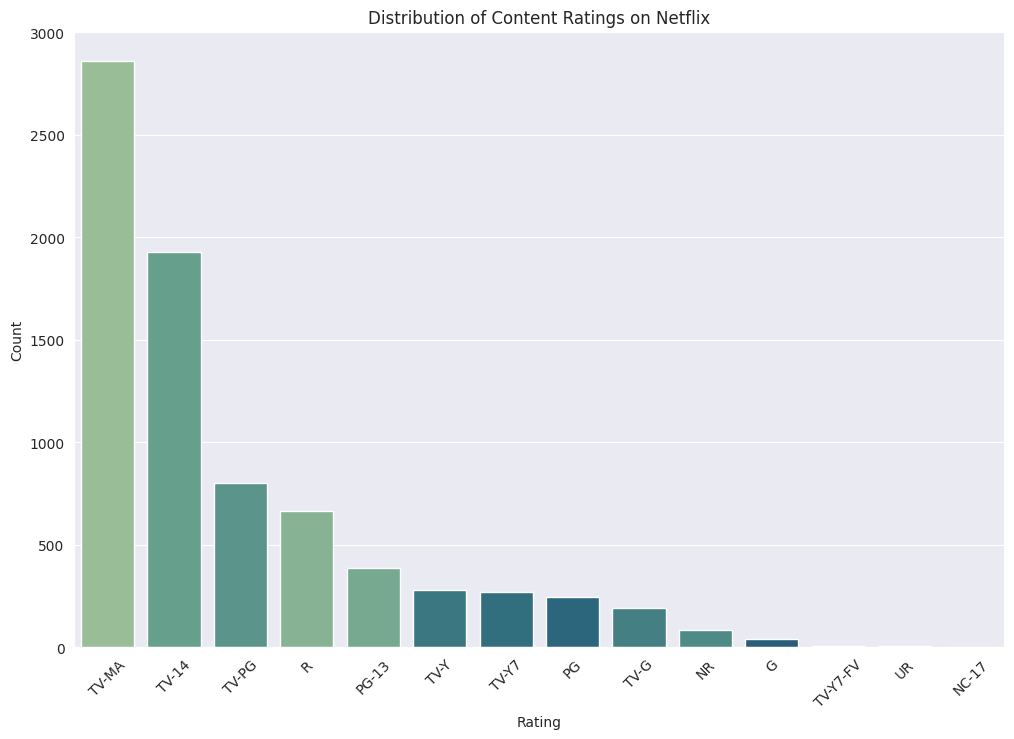

In [134]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

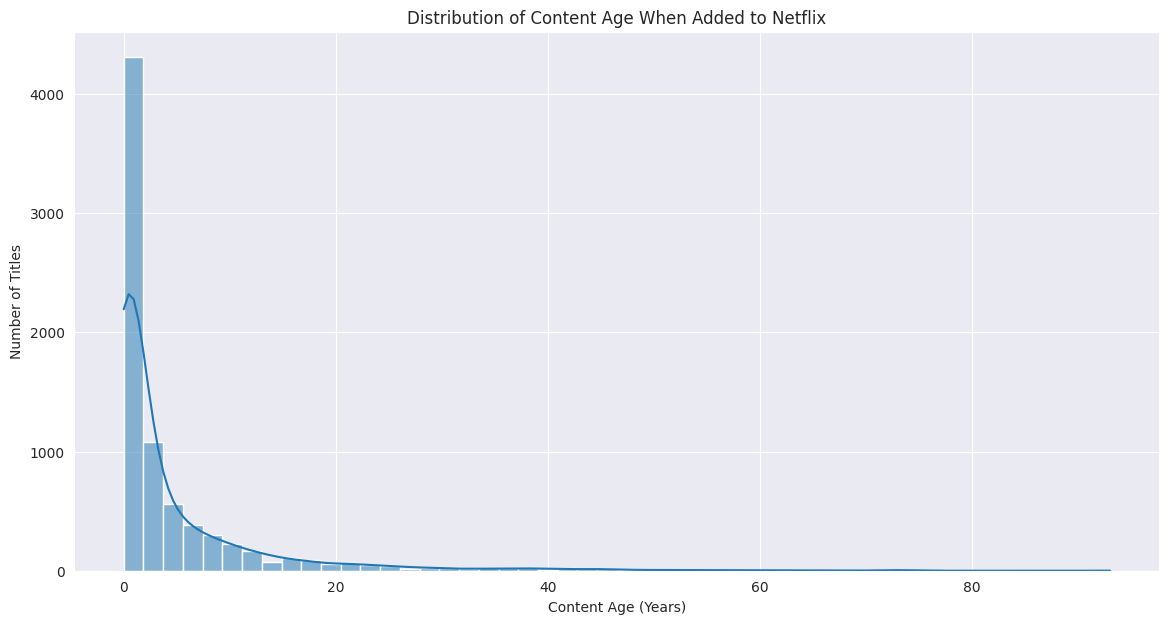

In [135]:
# Create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

### Step 6: Deeper Multivariate Analysis

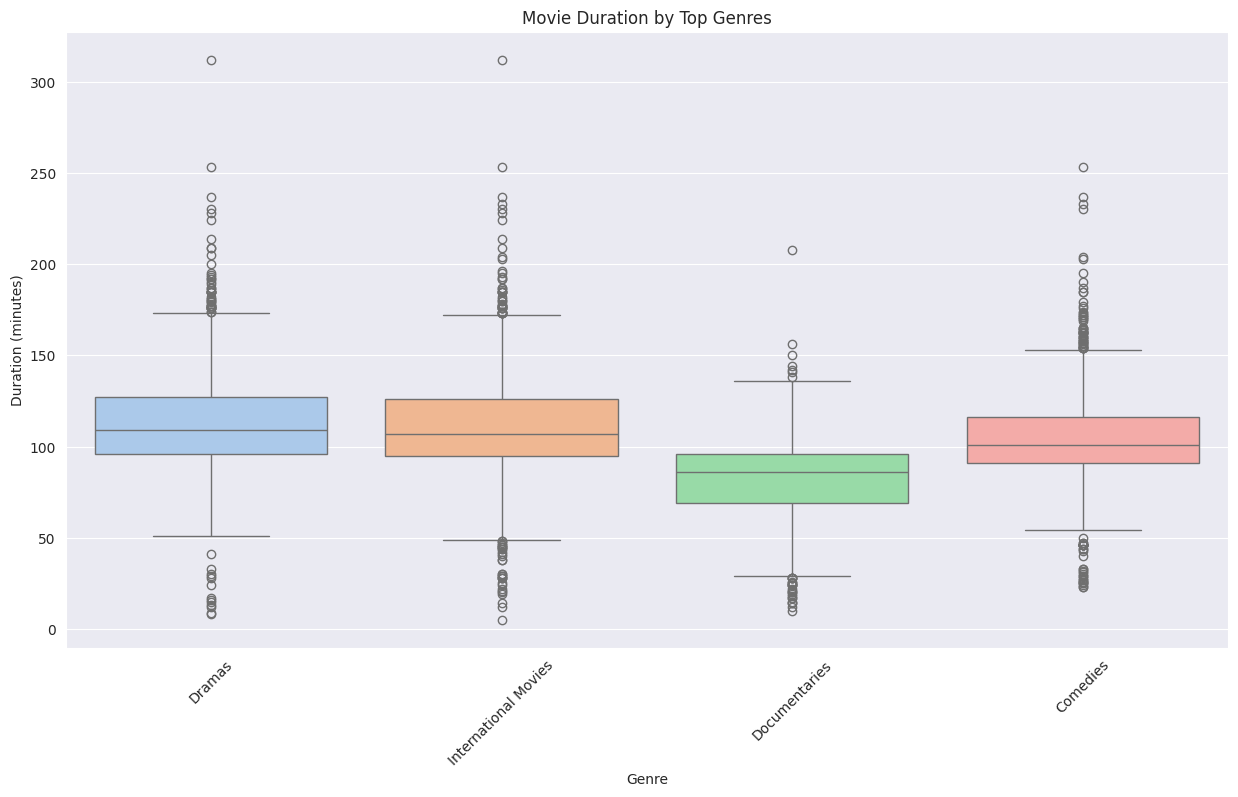

In [136]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

In [137]:
df['description']

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


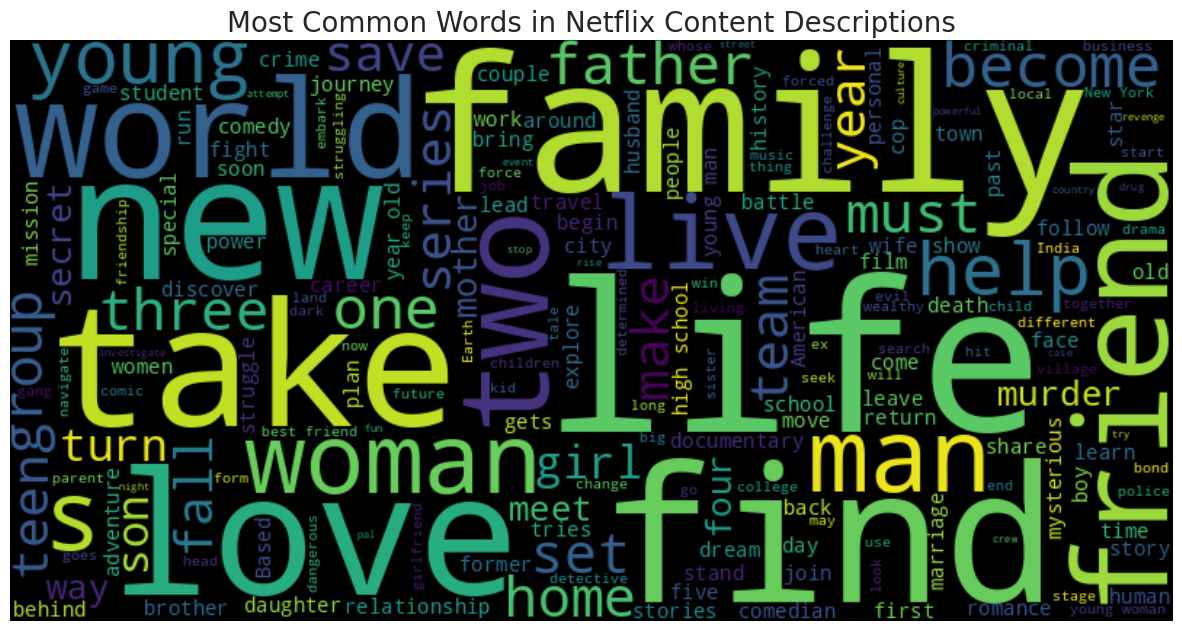

In [138]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# Submission Q's

* How has the distribution of content ratings changed over time?


In [139]:
rating_over_time=df.groupby(['year_added','rating']).size().unstack().fillna(0)

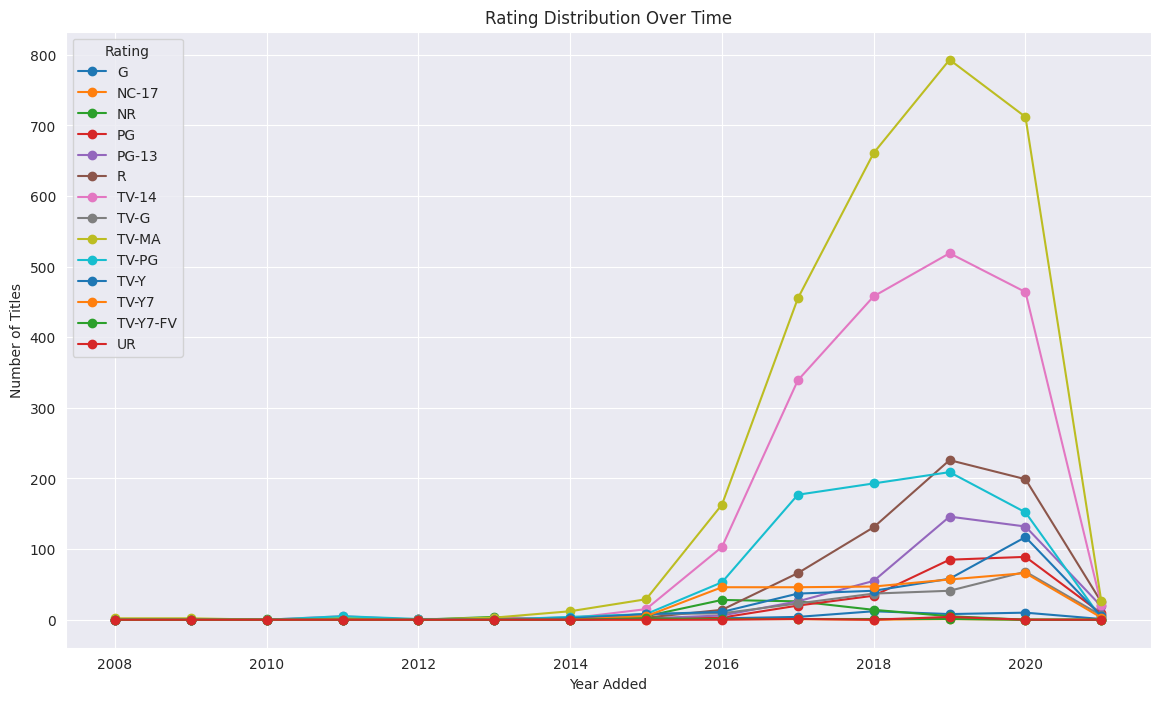

In [140]:
rating_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Rating Distribution Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')

Insight:
Over time, most of the content added on Netflix has been rated `TV-MA`, followed by `TV-14`.
Before 2019, Netflix released a higher proportion of `TV-PG` content, focusing more on family-friendly titles.
After 2019, there was a clear shift toward mature audiences, with an increase in `R` and TV-MA rated content.
The amount of `UR` (Unrated) content has always remained consistently low throughout the years.

* Is there a relationship between content age and its type (Movie vs. TV Show)?


In [141]:
content_age.groupby('type')['age_on_netflix'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Movie,5370.0,5.565736,9.729067,0.0,0.0,1.0,7.0,75.0
TV Show,2388.0,2.326214,5.287340,0.0,0.0,0.0,2.0,93.0


Text(0, 0.5, 'Content Age (Years)')

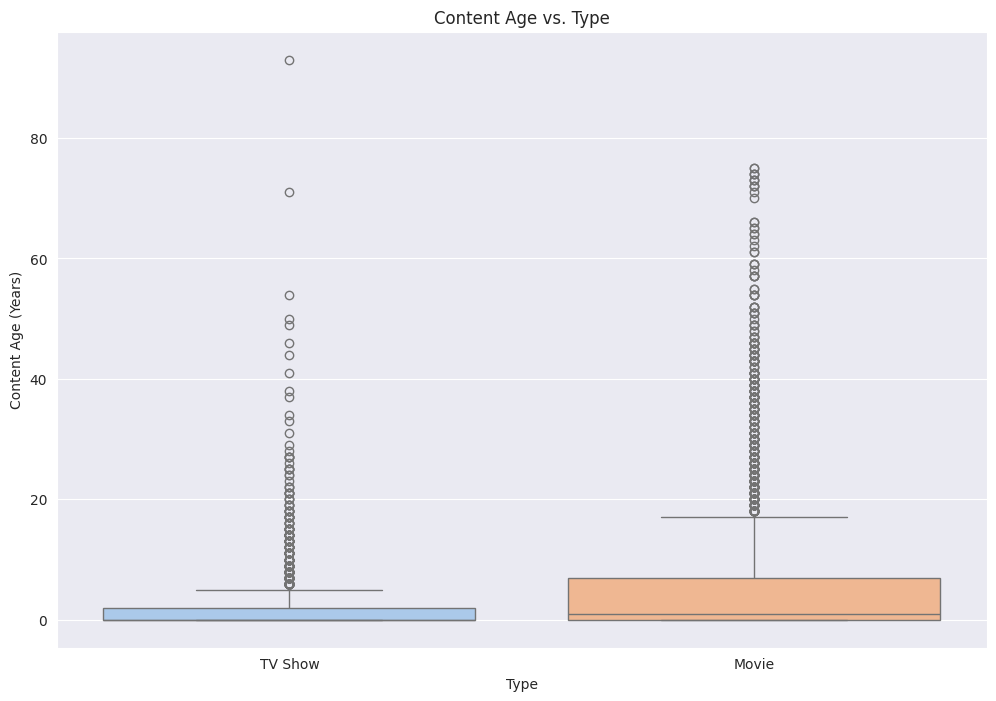

In [142]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=content_age, x='type', y='age_on_netflix', palette='pastel', hue='type', legend=False)
plt.title('Content Age vs. Type')
plt.xlabel('Type')
plt.ylabel('Content Age (Years)')

**Insight**:
There is a clear relationship between content age (Release Year – Year Added) and content type on Netflix.
`TV Shows` generally have a content age of less than 3 years, indicating that they are added shortly after release and rotated frequently to keep the platform’s offerings fresh.
`Movies`, on the other hand, have a content age of around 5 years, showing that Netflix retains films in its catalog for a longer period.
This pattern suggests that Netflix prioritizes keeping movies available long-term to maintain a stable library, while TV Shows are updated more frequently, likely due to new seasons and audience engagement strategies.

* Can we identify any trends in content production based on the release year vs. the year added to Netflix?


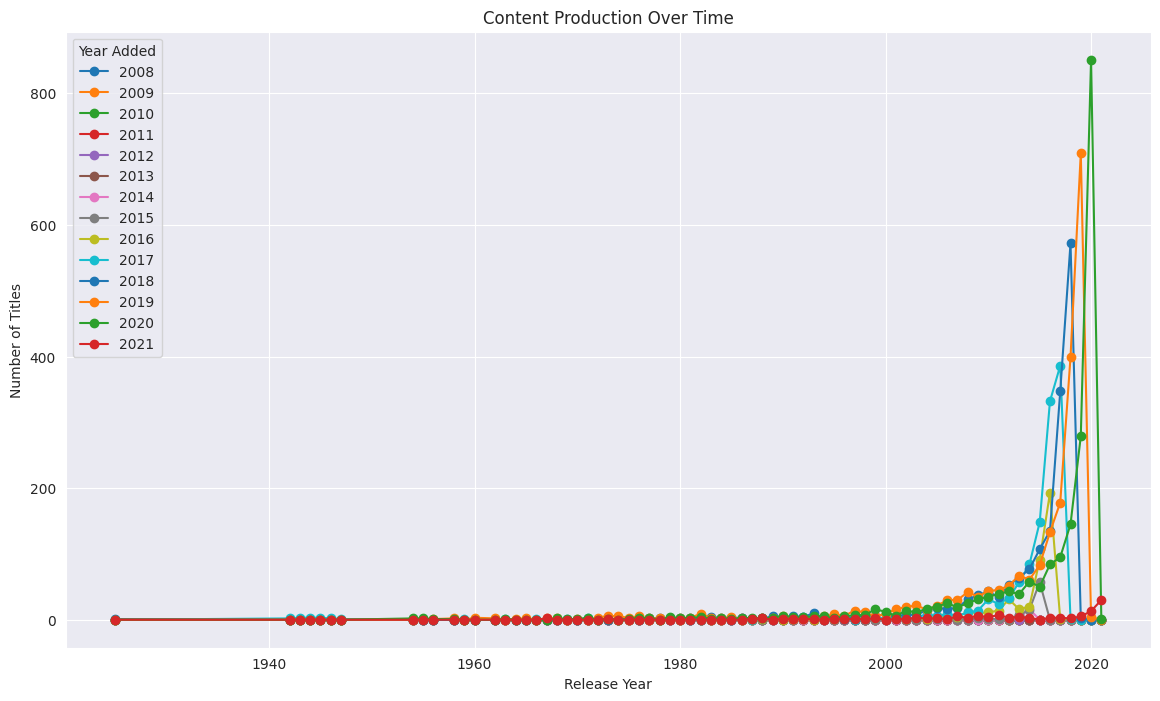

In [143]:
content_production=df.groupby(['release_year','year_added']).size().unstack().fillna(0)
content_production.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Production Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Year Added')

**Insight**
Over the years, Netflix’s content production and acquisition strategy has evolved significantly. Earlier, most titles added to the platform were older productions, often released 3–8 years before appearing on Netflix, indicating a reliance on licensed content from external studios. However, since around 2018, this pattern has shifted, with Netflix increasingly adding newly released and original content. The gap between the release year and the year added has now narrowed to less than a year, reflecting Netflix’s focus on producing and distributing original titles shortly after or alongside their release. This trend highlights Netflix’s transformation from a content distributor into a global content producer, emphasizing timely releases and exclusive programming to attract and retain subscribers.

* What are the most common word pairs or phrases in content descriptions?


In [144]:
df['description']=df['description'].astype(str).fillna(' ')

In [145]:
#Extract Common word pair and phrases in description(bigram and trigram)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(ngram_range=(2,3),stop_words='english')
X=vectorizer.fit_transform(df['description'])
#Get frequency of each phrase
sum_words=X.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
#Convert into dataframe
freq_df=pd.DataFrame(words_freq,columns=['phrase','frequency']).sort_values(by='frequency',ascending=False)
#Create a dictionary for Word Cloud
text_freq={row['phrase']:row['frequency']for index,row in freq_df.iterrows()}


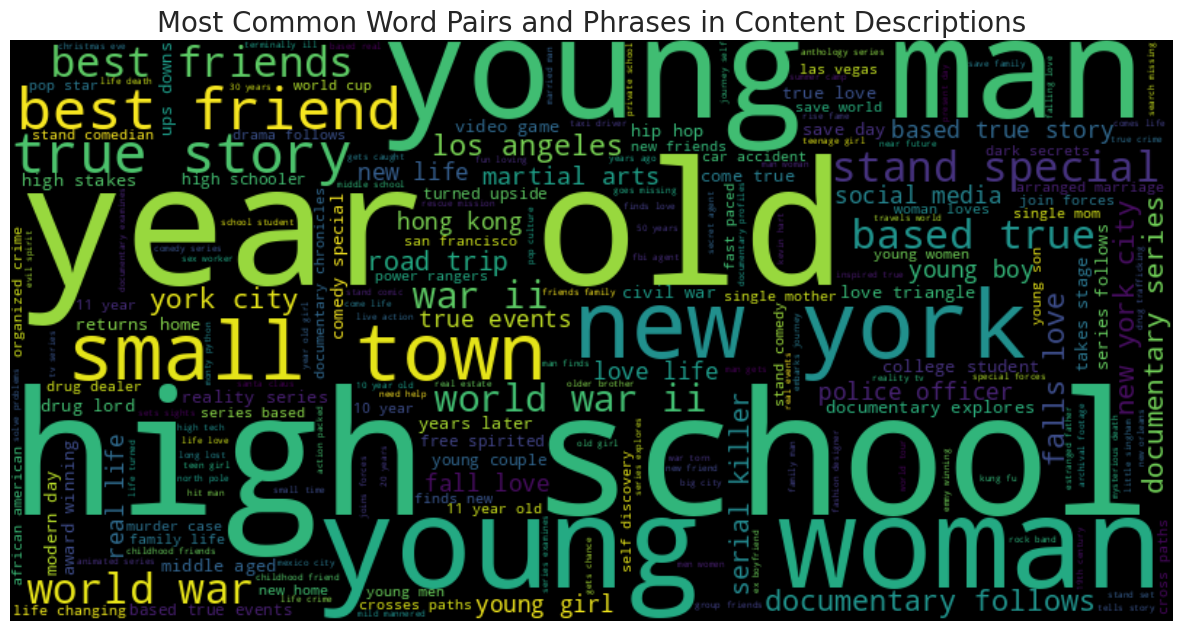

In [146]:
#Visualize using WordCloud
wordcloud=WordCloud(width=800,height=400,background_color='black',collocations=False).generate_from_frequencies(text_freq)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs and Phrases in Content Descriptions',fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Phrases like "young man," "high school,""young Woman,"small town best friend ," "new york," and "best friends" are prominent, suggesting "at much of the content revolves around human relationships and personal journeys. Action-oriented phrases like "world war," "fall love," and "year old" also appear frequently.

* Who are the top directors on Netflix?

In [147]:
top_directors=df['director'].value_counts().reset_index()
top_directors.columns=['director','count']
top_directors.head(15)

,director,count
0,Unknown,2376
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Youssef Chahine,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,David Dhawan,9


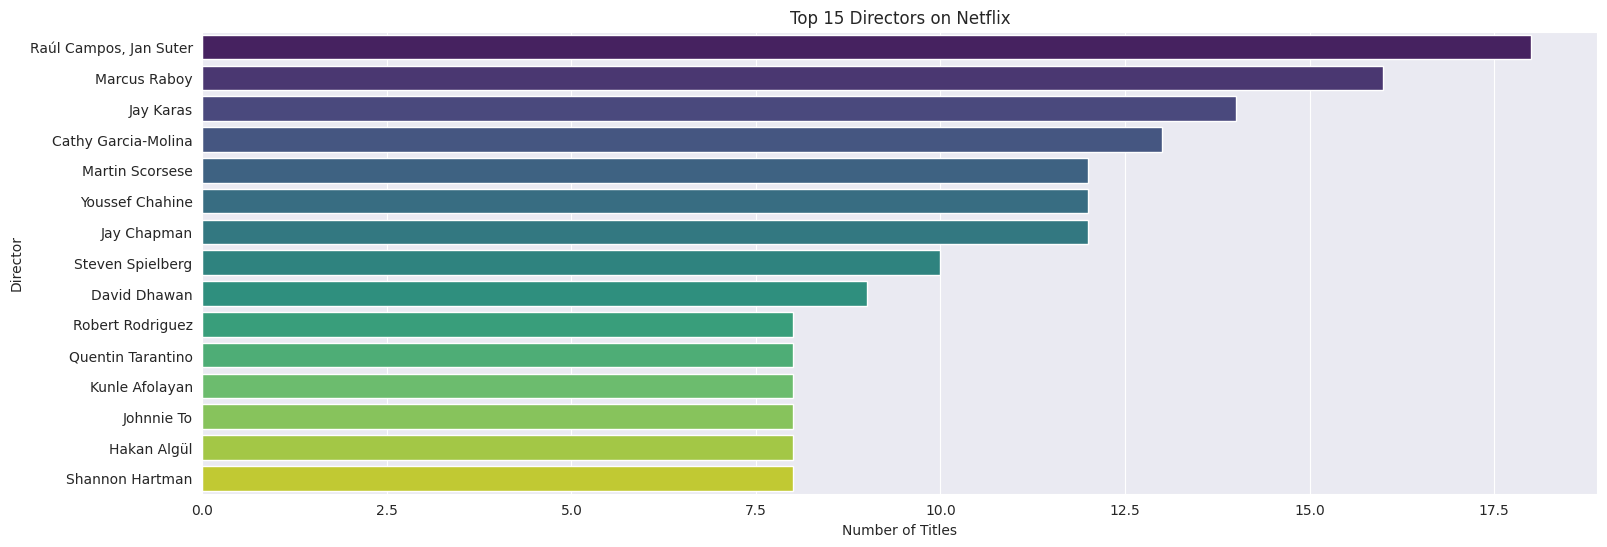

In [148]:
top_directors=top_directors[top_directors['director']!='Unknown']
top_15_directors=top_directors.head(15)

plt.figure(figsize=(18,6))
sns.barplot(x='count',y='director',data=top_15_directors,palette='viridis',hue='director',legend=False)
plt.title('Top 15 Directors on Netflix')
plt.ylabel('Director')
plt.xlabel('Number of Titles')
plt.show()

"Raúl Campos and Jan Suter" lead as the top-ranked directors on Netflix, indicating their strong presence in the platform’s catalog. They are followed by "Marcus Raboy" and "Jay Karas", with "Cathy Garcia-Molina" close behind. "Martin Scorsese," "Youssef Chahine," and "Jay Chapman" share the fifth position, reflecting a tie in their directorial representation.